In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud
from nltk import bigrams
from nltk import trigrams

In [4]:
df = pd.read_csv("../survey_data/youth_opinions_3.csv")

for col in df:
    #get dtype for column
    dt = df[col].dtype 
    #check if it is a number
    if dt == int or dt == float:
        df[col] = df[col].fillna(0)
    else:
        df[col] = df[col].fillna("-")
        
df.shape

(74, 20)

In [5]:
df.columns = ['gender','faculty','ug_pg','year','csp_cleared','cleared_mode',
              'clearing_plan','freq_see_elderly','elderly_do','knowledge_elderly_pop','freq_interact_w_elderly',
              'difficulties_interacting','difficulties_face','interest_participate_elderly_center_csp','thoughts_inter_hub','thoughts','brand',
              'disrupt_student_lives','disrupt_reason','interest_csp_elderly_smu']

In [6]:
df["disrupt_reason"].sample(5)

30    Because this initiative can be done on a volun...
53      doing good never needs to take up too much time
71    Out of class time, students may choose to pay ...
69                              Don’t see why it will! 
18    actually, this entirely depends on what you ai...
Name: disrupt_reason, dtype: object

In [7]:
content = ""

for index,value in df["disrupt_reason"].items():
    content += value + " "
    


tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(content)


stop_words = stopwords.words('english')
len(words)

extra_stop = ["one","stop","say","said","many","use","like","ideas","thing",
              "ho","co","in","or","will","could","well","says","cid","url","content",
              "https","www","ura","gov","sg","singapore","_","unless","there","theres","already"]

words_filtered = []

for w in words:
    w = w.lower()
    w = w.strip()
    if w not in stop_words and w not in extra_stop:
        words_filtered.append(w)
        
len(words_filtered)

  
lemmatizer = WordNetLemmatizer()
words_filtered_stemmed = []

for w in words_filtered:
    words_filtered_stemmed.append(lemmatizer.lemmatize(w))

    


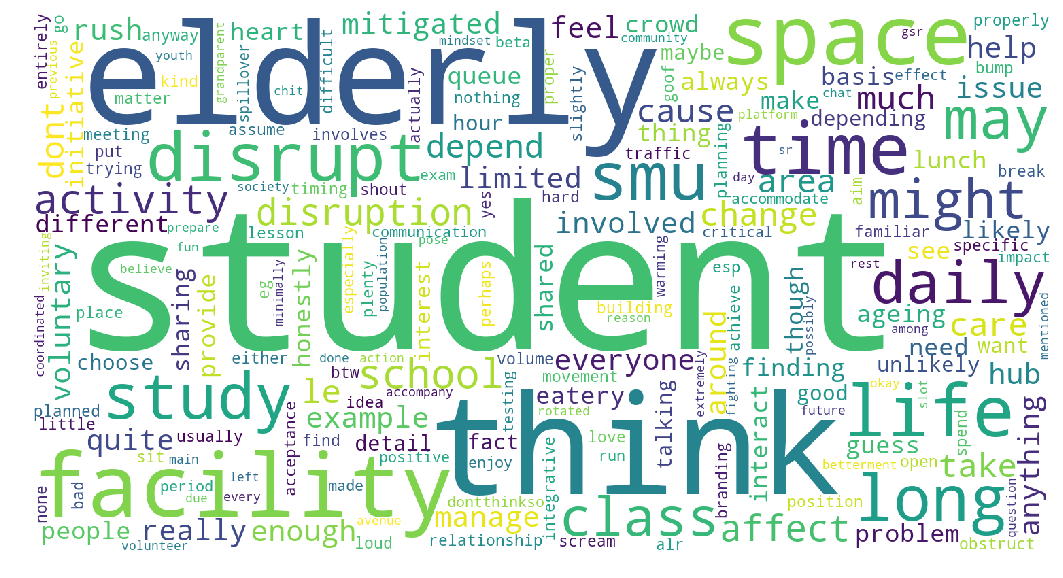

In [8]:
words_joined = " ".join([w for w in words_filtered_stemmed])
# Create a word cloud
my_wordcloud = WordCloud(background_color='white',
                         width=1500,
                         height=800).generate(words_joined)

plt.figure( figsize=(20,10))
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()

In [9]:
n_grams_filtered_words  = []

n_grams_stop = ["i", "think","as","don","it","or","have","to","be","the","is","an","are","they","were","if","and"]

for w in words:
    w = w.lower()
    w = w.strip()
    
    if w not in n_grams_stop:
        n_grams_filtered_words.append(w)
        
n_grams_filtered_words_lemmatized = []
for w in n_grams_filtered_words:
    n_grams_filtered_words_lemmatized.append(lemmatizer.lemmatize(w,'v'))


In [10]:
bigrams_words = bigrams(n_grams_filtered_words_lemmatized)

bigrm_tup_list = list(bigrams_words)
bigram_list = []

for tup in bigrm_tup_list:
    content = ""
    for item in tup:
        content += item + "_"
    bigram_list.append(content)

bi_words_joined = " ".join([w for w in bigram_list])

In [11]:
trigram_words = trigrams(n_grams_filtered_words_lemmatized)
trigrm_tup_list = list(trigram_words)
trigram_list = []

for tup in trigrm_tup_list:
    content = ""
    for item in tup:
        content += item + "_"
    trigram_list.append(content)

tri_words_joined = " ".join([w for w in trigram_list])

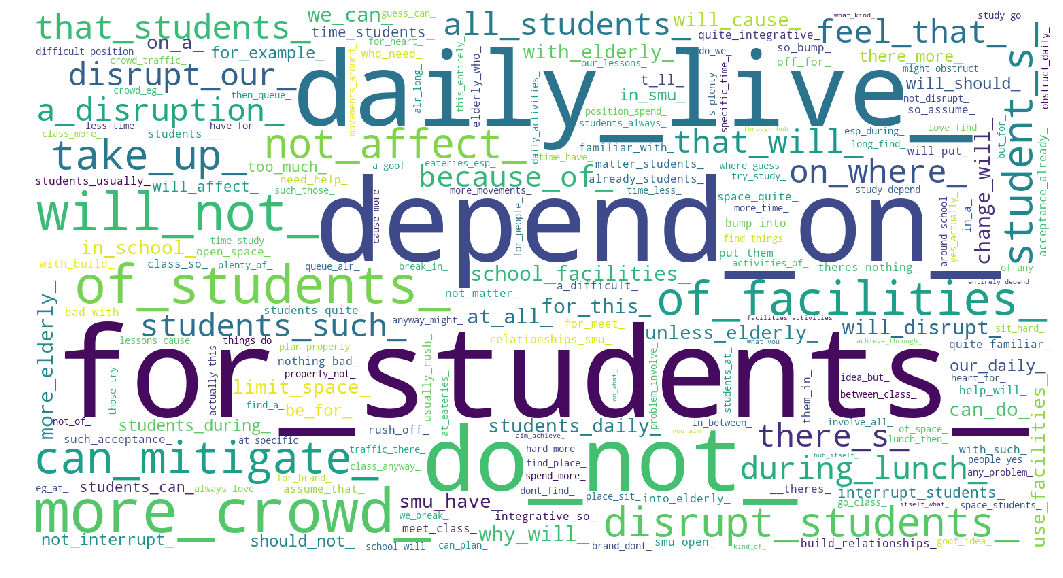

In [12]:


my_wordcloud_bi = WordCloud(background_color='white',
                         width=1500,
                         height=800).generate(bi_words_joined)

plt.figure( figsize=(20,10))
plt.imshow(my_wordcloud_bi)
plt.axis('off')
plt.show()

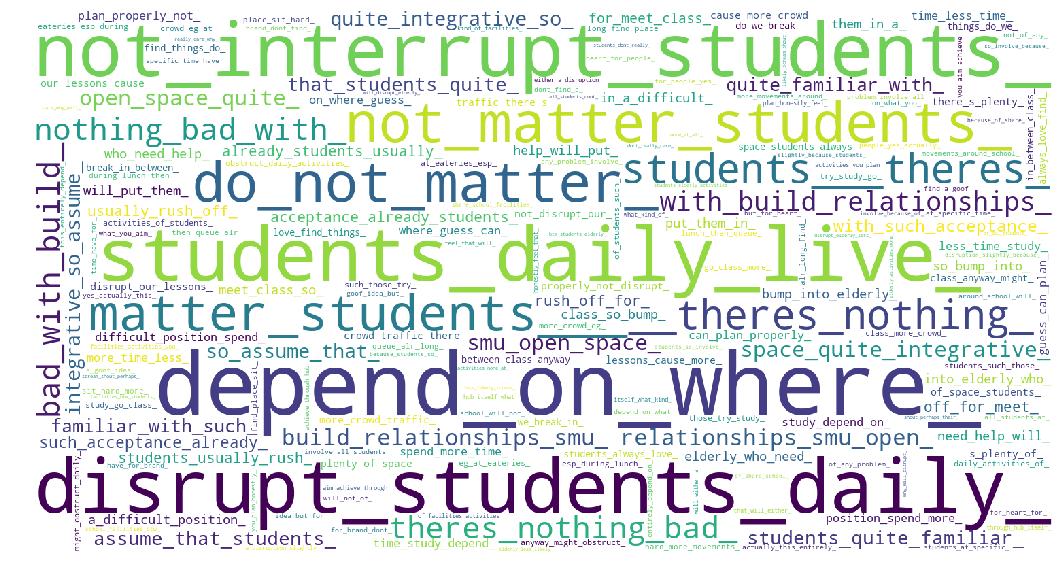

In [13]:


my_wordcloud_bi = WordCloud(background_color='white',
                         width=1500,
                         height=800).generate(tri_words_joined)

plt.figure( figsize=(20,10))
plt.imshow(my_wordcloud_bi)
plt.axis('off')
plt.show()

In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [37]:
score_list = []
score_category = {"positive": [], "negative":[] , "neutral":[]}

for text in df["thoughts"]:
    
    if text != "-" and text != 'nil' and text != '_':
        score = analyser.polarity_scores(text)
        aggr_score = score["compound"]
        
        if aggr_score > 0:
            score_category["positive"].append((text,aggr_score))
        elif aggr_score < 0:
            score_category["negative"].append((text,aggr_score))
        else:
            score_category["neutral"].append((text,aggr_score))
        
        score_list.append(score["compound"])
        
        
print("TOP 5 POSITIVE SENTIMENTS")
print(sorted(score_category['positive'],key=lambda x: x[1],reverse=True)[:5])
print()

print("TOP 5 NEGATIVE SENTIMENTS")
print(sorted(score_category['negative'],key=lambda x: x[1])[:6])
print



print("# of Positive Sentiments:",len(score_category['positive']))
print("# of Neutral Sentiments:",len(score_category['neutral']))
print("# of Negative Sentiments:",len(score_category['negative']))




TOP 5 POSITIVE SENTIMENTS
[("Considering that there are other elderly-related local CSP programs in SMU (Kscope) i'm not sure whether you'll get enough demand for this program. Although i'm unsure of how this idea will work out, but I would think this is a good opportunity for students to clear CSP and also for others in our direct community to benefit. When other students see the direct impact, they may be more motivated to pursue this CSP opportunity.", 0.9714), ("I think it's good because most CSPs I noticed are focused on kids, sure it's good but that's also why I decided to help out at an elder care.", 0.9217), ("It's a good idea to centralise and have an official venue to promote healthy and active ageing. Also a good idea to have a platform where youth and elderly could interact with each other.", 0.9153), ("Given Singapore's ageing population, I think that we as a community should support each other and this will allow us to understand the elderly better which hopefully allow t